# <center> Storage analysis codes
Created by Ahmad Mojiri (4/Dec/2019) <br>
This notebook contains the codes that analyse the tehnical aspects of the battery, such as:<br>
    1- charging/discharging profile <br>
    2- comparison of the battery charing/discharging cyces against the battery with perfcet foresight <br>
    


# ```charg_disch_inspector```
Generate the data for comparing storage charge/discharge <br>
This is a parallel computing code. <br>
It geerates the charging and discharging accuracy of storage system with rolling and daily forecast against a storage with perfect foresight.<br>

In [1]:
import sys, import os
print("Operating system: %s" %sys.platform)
if sys.platform == 'win32':
    curr_path = 'c:\\Nextcloud\\Thermal Battery Research\\modelling\\python'
elif sys.platform == 'linux':
    curr_path = '/home/jeff/cloud/documents/work/ANU/Thermal Battery Research/modelling/python'
else: print("What operating system are you running?! I've never even heard of %s" %sys.platform)
if curr_path not in sys.path:
    sys.path.append(curr_path)
    print('Path added! \n')
os.chdir(curr_path)
print("Working directory is now %s" %curr_path)

import pandas as pd 
import numpy as np
import multiprocessing as mp
from package.storage_analysis import compare_storage

if __name__=='__main__':
    pool = mp.Pool(mp.cpu_count()-1)
    output = [pool.apply_async(compare_storage, args=(FS, State, Year, SH,RTE,Cap,Loss))
              for State in (['SA'])
              for FS in (['rolling','daily'])
              for RTE in ([40,90])
              for Year in np.arange(2010,2019,1)
              for SH in ([10])
              for Loss in ([0])
              for Cap in ([14500])]
    pool.close()
    pool.join()
cols = ['FS', 'State', 'year', 'RTE', 'SV-PF', 'SV', 'charge_acc', 'disch_acc']
comp_res = pd.DataFrame(columns=cols)
for i in range(len(output)):
    comp_res = comp_res.append(output[i].get(), ignore_index=True)
    


Operating system: win32
Path added! 

Working directory is now c:\Nextcloud\Thermal Battery Research\modelling\python


# ```plot_charg_disch_results```<br>
This codes plots the results generated by ```charg_disch_inspector```.

Operating system: win32
Working directory is now c:\Nextcloud\Thermal Battery Research\modelling\python


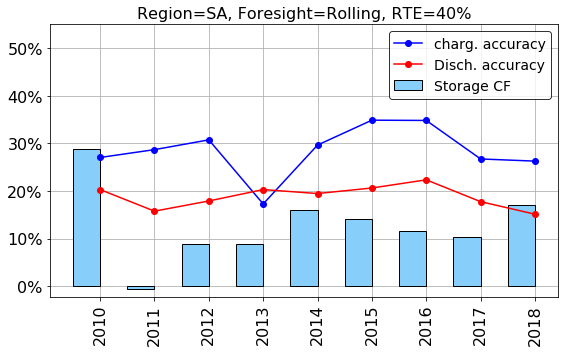

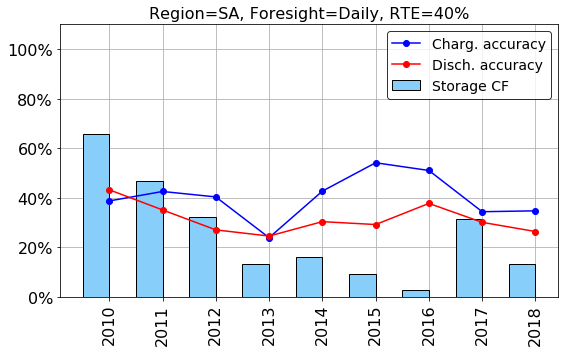

In [3]:
import sys
import os

#Check and see if the current working path exists in python system.
#otherwise add it.

print("Operating system: %s" %sys.platform)

if sys.platform == 'win32':
    curr_path = 'c:\\Nextcloud\\Thermal Battery Research\\modelling\\python'
elif sys.platform == 'linux':
    curr_path = '/home/jeff/cloud/documents/work/ANU/Thermal Battery Research/modelling/python'
else: print("What operating system are you running?! I've never even heard of %s" %sys.platform)

if curr_path not in sys.path:
    sys.path.append(curr_path)
    print('Path added! \n')

os.chdir(curr_path)
print("Working directory is now %s" %curr_path)

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

State = 'SA'
RTE = 40
data = comp_res[(comp_res['State']== State) & (comp_res['RTE']== RTE)].sort_values('year')

#plotting
font_size = 16
Width=0.5

# plot rolling
FS='rolling'
fig1 = plt.figure(figsize=(8, 5))
ax1 = fig1.add_subplot(111)
plt.title('Region=%s, Foresight=%s, RTE=%d%%'
          % (State, FS.capitalize(), RTE), fontsize=font_size)
plt.grid()

data_rolling = data[data['FS']==FS]
plt.plot(data_rolling['year'], data_rolling['charge_acc'], 'b', marker='o', label='charg. accuracy')
plt.plot(data_rolling['year'], data_rolling['disch_acc'], 'r', marker='o', label='Disch. accuracy')
plt.bar(data_rolling['year']-0.5*Width, data_rolling['SV']/data_rolling['SV-PF'], 
        width=Width, edgecolor='k', color='lightskyblue', label='Storage CF')
plt.legend(loc='best', fontsize=font_size-2)
plt.rcParams["legend.edgecolor"] = 'k'
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.rc('ytick', labelsize=font_size) 
plt.ylim(ymax=1.1)
ax1.set_axisbelow(True)
plt.xticks(np.arange(2010,2019,1), fontsize=font_size, rotation=90)
plt.tight_layout()
plt.show()
# plt.savefig(
# 'd:\\Nextcloud\\Thermal Battery Research\\Publications\\\
# The value of grid-scale electricity storage in competitive energy market\\\
# pictures\\storage analysis\\%s_FS=%s_RTE=%d.eps'
#     %(State, FS, RTE), format='eps')
# plt.savefig(
# 'd:\\Nextcloud\\Thermal Battery Research\\Publications\\\
# The value of grid-scale electricity storage in competitive energy market\\\
# pictures\\storage analysis\\%s_FS=%s_RTE=%d.png'
#     %(State, FS, RTE), dpi=600)


#plot daily
FS='daily'
fig2 = plt.figure(figsize=(8, 5))
ax2 = fig2.add_subplot(111)
plt.title('Region=%s, Foresight=%s, RTE=%d%%'
          % (State, FS.capitalize(), RTE), fontsize=font_size)
plt.grid()

data_daily = data[data['FS']==FS]
plt.plot(data_daily['year'], data_daily['charge_acc'], 'b', marker='o', label='Charg. accuracy')
plt.plot(data_daily['year'], data_daily['disch_acc'], 'r', marker='o', label='Disch. accuracy')
plt.bar(data_daily['year']-0.5*Width, data_daily['SV']/data_daily['SV-PF'], width=Width, edgecolor='k',
        label= 'Storage CF', color='lightskyblue')
plt.legend(loc='best', fontsize=font_size-2)
plt.rcParams["legend.edgecolor"] = 'k'
plt.ylim(ymax=1.1)
ax2.set_axisbelow(True)
plt.xticks(np.arange(2010,2019,1), fontsize=font_size, rotation=90)
ax2.get_xaxis().get_major_formatter().set_useOffset(False)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
ax2.tick_params(axis="y", labelsize=font_size)
plt.tight_layout()
plt.show()
# plt.savefig(
# 'd:\\Nextcloud\\Thermal Battery Research\\Publications\\\
# The value of grid-scale electricity storage in competitive energy market\\\
# pictures\\storage analysis\\%s_FS=%s_RTE=%d.eps'
#     %(State, FS, RTE), format='eps')
# plt.savefig(
# 'd:\\Nextcloud\\Thermal Battery Research\\Publications\\\
# The value of grid-scale electricity storage in competitive energy market\\\
# pictures\\storage analysis\\%s_FS=%s_RTE=%d.png'
#     %(State, FS, RTE), dpi=600)


# Plot charge and discharge profiles

Operating system: win32
Working directory is now c:\Nextcloud\Thermal Battery Research\modelling\python
SA 2016 0.4 10


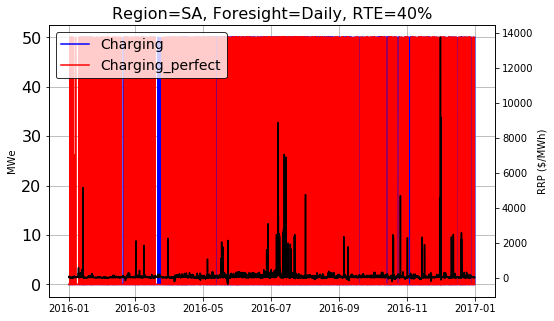

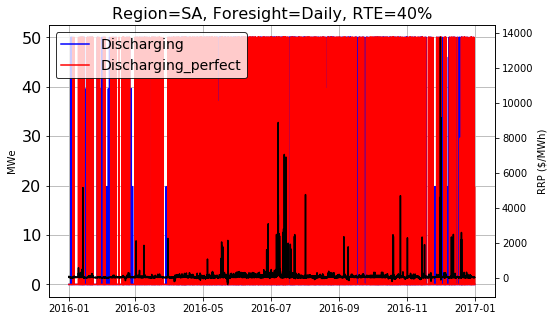

In [3]:
import sys
import os

#Check and see if the current working path exists in python system.
#otherwise add it.

print("Operating system: %s" %sys.platform)

if sys.platform == 'win32':
    curr_path = 'c:\\Nextcloud\\Thermal Battery Research\\modelling\\python'
elif sys.platform == 'linux':
    curr_path = '/home/jeff/cloud/documents/work/ANU/Thermal Battery Research/modelling/python'
else: print("What operating system are you running?! I've never even heard of %s" %sys.platform)

if curr_path not in sys.path:
    sys.path.append(curr_path)
    print('Path added! \n')

os.chdir(curr_path)
print("Working directory is now %s" %curr_path)

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd 
import numpy as np
import multiprocessing as mp
import package.storage_analysis as sa
sa.monitor_storage('daily','SA',2016,10,40,14500,0)


# Revenue analysis of the perfect storage

In [3]:
import sys;import os
print("Operating system: %s" %sys.platform)
if sys.platform == 'win32':
    curr_path = 'c:\\Nextcloud\\Thermal Battery Research\\modelling\\python'
elif sys.platform == 'linux':
    curr_path = '/home/jeff/cloud/documents/work/ANU/Thermal Battery Research/modelling/python'
else: print("What operating system are you running?! I've never even heard of %s" %sys.platform)
if curr_path not in sys.path:
    sys.path.append(curr_path)
    print('Path added! \n')
os.chdir(curr_path)
print("Working directory is now %s" %curr_path)

import projdirs
import multiprocessing as mp
from package.storage_analysis import analyse_revenue 
# analyse_revenue('SA',90)

if __name__=='__main__':
    pool = mp.Pool(mp.cpu_count())
    output = [pool.apply_async(analyse_revenue, args=(state,rte))
              for state in (['SA','NSW'])
              for rte in ([40,90])]
    pool.close()
    pool.join()

Operating system: win32
Working directory is now c:\Nextcloud\Thermal Battery Research\modelling\python


# Plot the cumulative distribution of spot prices for each year and each state

In [216]:
Year = np.arange(2010,2019,1)
state = 'TAS'

RRP = pd.DataFrame(columns = ['year', 'rrp'])
for year in Storage.index:
    rrp = gd.load_rrp_cal(year, state)
    RRP = RRP.append({'year': year,
                      'rrp': rrp.values}, ignore_index=True)

RRP = RRP.set_index('year')                  

#start plotting
zoom = False
plt.close('all')
font_size = 16
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
if zoom:
    plt.title('Region=%s, $300<price<RRP' %(state), fontsize=font_size)
else:
    plt.title('Region=%s, price<RRP' %(state), fontsize=font_size)


cmap = plt.get_cmap('gnuplot2')
for (Color, year) in enumerate(Storage.index):
    price = RRP.loc[year]
    count = list([])
    rrp_range = np.arange(0,14000,5)
    for rrp in rrp_range:
        if zoom:
            count.append(len(price.all()[(price.all()<rrp) & (price.all()>300)]))#/len(price.all())
        else:
            count.append(len(price.all()[(price.all()<rrp)]))#/len(price.all())
    plt.plot(rrp_range,count, label=year, color=cmap(Color/(len(Year)+1)), lw=1.5 )
    
plt.grid(b=True, which='major', color='k', linestyle='-')
plt.grid(b=True, which='minor', color='gray', linestyle='--')

plt.xscale('log')
# plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend(loc='best', fontsize=font_size-2)
plt.xlabel('RRP [$/MWh]', fontsize=font_size)
plt.ylabel('Count', fontsize=font_size)
plt.tick_params(axis="both", labelsize=font_size)
plt.tight_layout()
ax.set_axisbelow(True)

if zoom:
    file_name = state+'_zoomed'
else:
    file_name = state
plt.savefig(
'd:\\Nextcloud\\Thermal Battery Research\\Publications\\\
The value of grid-scale electricity storage in competitive energy market\\\
pictures\\RRP annual\\Cumulative\\%s.eps'
    %(file_name), format='eps')
plt.savefig(
'd:\\Nextcloud\\Thermal Battery Research\\Publications\\\
The value of grid-scale electricity storage in competitive energy market\\\
pictures\\RRP annual\\Cumulative\\%s.png'
    %(file_name), dpi=600)